#6 class proposed 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
img_rows, img_cols = 224, 224 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

In [3]:

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()  
valid_datagen = ImageDataGenerator()

train_generator1 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['motorbike&airplan','flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='categorical')

valid_generator1 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['motorbike&airplan','flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='categorical')

train_generator21 = train_datagen.flow_from_directory(
       '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['motorbike','airplane'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator21 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['motorbike','airplane'], 
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator22 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator22 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator23 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='binary')

valid_generator23 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='binary')

Found 2298 images belonging to 3 classes.
Found 1063 images belonging to 3 classes.
Found 766 images belonging to 2 classes.
Found 351 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [21]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model21 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model22 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model23 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

94781440/94765736 [==============================] - 1s 0us/step


In [22]:
for layer in base_model1.layers:   layer.trainable = False
for layer in base_model21.layers:   layer.trainable = False
for layer in base_model22.layers:   layer.trainable = False
for layer in base_model23.layers:   layer.trainable = False

In [23]:
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation ='softmax')(x)
model1 = tf.keras.models.Model(inputs=base_model1.input, outputs=preds)

x = base_model21.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model21 = tf.keras.models.Model(inputs=base_model21.input, outputs=preds)


x = base_model22.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model22 = tf.keras.models.Model(inputs=base_model22.input, outputs=preds)

x = base_model23.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)   # the only diff
model23 = tf.keras.models.Model(inputs=base_model23.input, outputs=preds)

In [24]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model21.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model22.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model23.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
cb1= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb2= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb3= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb4= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)


In [27]:
history = model1.fit(
      train_generator1,
      steps_per_epoch=train_generator1.n//train_generator1.batch_size,
      epochs=25,
      validation_data=valid_generator1,callbacks=[cb1],
      validation_steps=25)



Epoch 1/25
71/71 [==============================] - 37s 521ms/step - loss: 0.0149 - accuracy: 0.9974 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 2/25
71/71 [==============================] - 101s 1s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0018 - val_accuracy: 0.9987
Epoch 3/25
71/71 [==============================] - 42s 594ms/step - loss: 0.0073 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9975
Epoch 4/25
71/71 [==============================] - 24s 339ms/step - loss: 5.5956e-05 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 5/25
71/71 [==============================] - 23s 329ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 6/25
71/71 [==============================] - 22s 313ms/step - loss: 0.1111 - accuracy: 0.9823 - val_loss: 0.0506 - val_accuracy: 0.9887
Epoch 7/25
71/71 [==============================] - 22s 316ms/step - loss: 0.0207 - accuracy: 0.9951 - val_loss: 3.2674e-05 - val_accuracy: 

In [28]:
history = model21.fit(
      train_generator21,
      steps_per_epoch=train_generator21.n//train_generator21.batch_size,
      epochs=25,
      validation_data=valid_generator21,callbacks=[cb2],
      validation_steps=10)



Epoch 1/25
23/23 [==============================] - 349s 15s/step - loss: 0.2712 - accuracy: 0.9319 - val_loss: 7.5989e-06 - val_accuracy: 1.0000
Epoch 2/25
23/23 [==============================] - 8s 346ms/step - loss: 0.0173 - accuracy: 0.9986 - val_loss: 6.3075e-07 - val_accuracy: 1.0000
Epoch 3/25
23/23 [==============================] - 8s 337ms/step - loss: 7.7360e-05 - accuracy: 1.0000 - val_loss: 3.0268e-04 - val_accuracy: 1.0000
Epoch 4/25
23/23 [==============================] - 8s 337ms/step - loss: 7.8236e-06 - accuracy: 1.0000 - val_loss: 7.6995e-07 - val_accuracy: 1.0000
Epoch 5/25
23/23 [==============================] - 8s 345ms/step - loss: 3.0898e-08 - accuracy: 1.0000 - val_loss: 7.1262e-08 - val_accuracy: 1.0000
Epoch 6/25
23/23 [==============================] - 8s 344ms/step - loss: 1.7926e-08 - accuracy: 1.0000 - val_loss: 1.7240e-10 - val_accuracy: 1.0000
Epoch 7/25
23/23 [==============================] - 8s 339ms/step - loss: 1.6355e-08 - accuracy: 1.0000 - va

In [29]:
history = model22.fit(
      train_generator22,
      steps_per_epoch=train_generator22.n//train_generator22.batch_size,
      epochs=25,
      validation_data=valid_generator22,callbacks=[cb3],
      validation_steps=10)



Epoch 1/25
23/23 [==============================] - 354s 15s/step - loss: 0.0775 - accuracy: 0.9659 - val_loss: 0.3331 - val_accuracy: 0.9750
Epoch 2/25
23/23 [==============================] - 9s 398ms/step - loss: 1.6324e-04 - accuracy: 1.0000 - val_loss: 9.3127e-17 - val_accuracy: 1.0000
Epoch 3/25
23/23 [==============================] - 8s 346ms/step - loss: 7.2093e-15 - accuracy: 1.0000 - val_loss: 1.7479e-15 - val_accuracy: 1.0000
Epoch 4/25
23/23 [==============================] - 8s 346ms/step - loss: 4.2194e-14 - accuracy: 1.0000 - val_loss: 9.0090e-16 - val_accuracy: 1.0000
Epoch 5/25
23/23 [==============================] - 8s 342ms/step - loss: 4.4496e-14 - accuracy: 1.0000 - val_loss: 8.4077e-16 - val_accuracy: 1.0000
Epoch 6/25
23/23 [==============================] - 8s 347ms/step - loss: 4.5034e-14 - accuracy: 1.0000 - val_loss: 8.3522e-16 - val_accuracy: 1.0000
Epoch 7/25
23/23 [==============================] - 8s 344ms/step - loss: 4.5099e-14 - accuracy: 1.0000 - va

In [30]:
history = model23.fit(
      train_generator23,
      steps_per_epoch=train_generator23.n//train_generator23.batch_size,
      epochs=25,
      validation_data=valid_generator23,callbacks=[cb4],
      validation_steps=10)

Epoch 1/25
47/47 [==============================] - 297s 6s/step - loss: 0.1269 - accuracy: 0.9493 - val_loss: 8.7725e-11 - val_accuracy: 1.0000
Epoch 2/25
47/47 [==============================] - 34s 742ms/step - loss: 1.3620e-09 - accuracy: 1.0000 - val_loss: 1.6892e-10 - val_accuracy: 1.0000
Epoch 3/25
47/47 [==============================] - 19s 414ms/step - loss: 1.4412e-09 - accuracy: 1.0000 - val_loss: 1.1886e-11 - val_accuracy: 1.0000
Epoch 4/25
47/47 [==============================] - 14s 308ms/step - loss: 1.3659e-09 - accuracy: 1.0000 - val_loss: 1.7043e-10 - val_accuracy: 1.0000
Epoch 5/25
47/47 [==============================] - 11s 233ms/step - loss: 1.2833e-09 - accuracy: 1.0000 - val_loss: 1.1851e-11 - val_accuracy: 1.0000
Epoch 6/25
47/47 [==============================] - 9s 197ms/step - loss: 1.2068e-09 - accuracy: 1.0000 - val_loss: 1.3719e-10 - val_accuracy: 1.0000
Epoch 7/25
47/47 [==============================] - 9s 188ms/step - loss: 1.1152e-09 - accuracy: 1.00

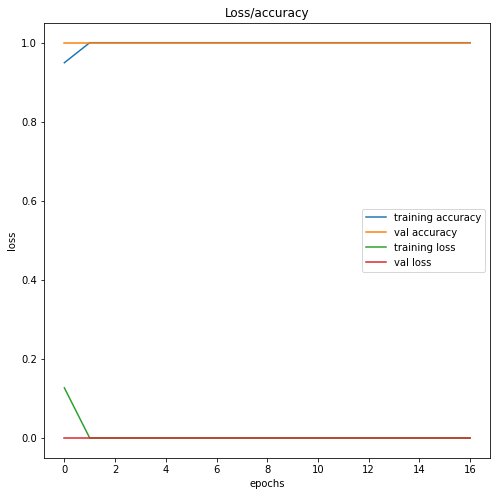

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [33]:
ct_person=0;ct_dog=0;ct_motorbike=0; ct_airplane=0; ct_car=0; ct_flower=0;

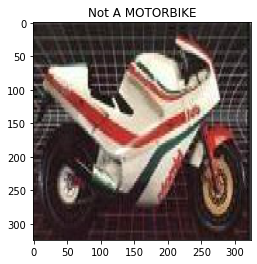

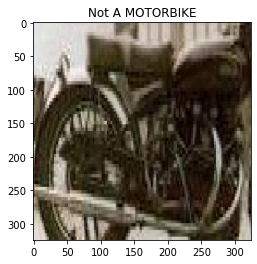

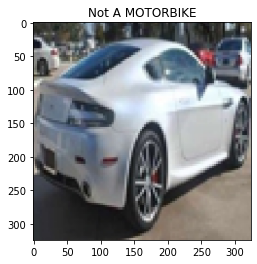

167


In [34]:
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/motorbike/'
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)  # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  #classesb22 = model22.predict(images, batch_size=10)
  # print('bikes:',classesb1[0][0],classesb21[0])
  if((classesb1[0][0] > .5) and (classesb21[0] < .5)):    ct_motorbike=ct_motorbike+1
  else:
    plt.imshow(img)
    plt.title('Not A MOTORBIKE')
    plt.show()
print(ct_motorbike)

In [46]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/airplane/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classess1 = model1.predict(images, batch_size=10)
  classess21 = model21.predict(images, batch_size=10)
  #classess22 = model22.predict(images, batch_size=10)
  # print('ships:',classess1[0][0],classess21[0])
  if((classess1[0][0] > .5) and (classess21[0] > .5)):    ct_airplane=ct_airplane+1
  else:
      plt.imshow(img)
      plt.title('Not An airplane')
      plt.show()
print(ct_airplane)

./
167


./


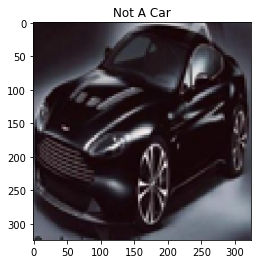

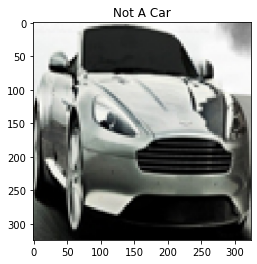

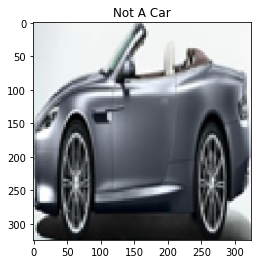

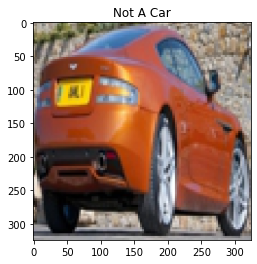

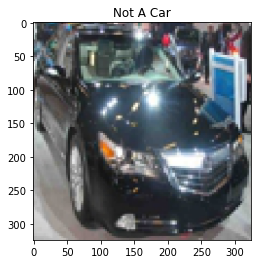

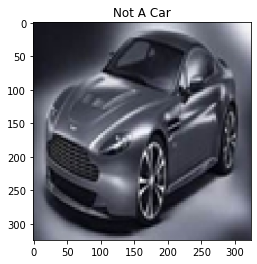

In [35]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/car/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classest1 = model1.predict(images, batch_size=10)
  #classest21 = model21.predict(images, batch_size=10)
  classest22 = model22.predict(images, batch_size=10)
  # print('tracs:',classest1[0][1],classest22[0])
  if((classest1[0][1] > .5) and (classest22[0] > .5)):    ct_car=ct_car+1
  else:
    plt.imshow(img)
    plt.title('Not A Car')
    plt.show()

In [36]:
print(ct_car)

160


./


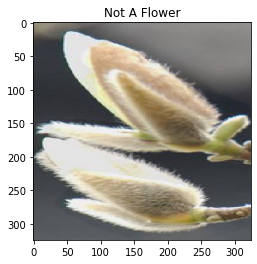

165


In [37]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/flower/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('flower:',classesw1[0][1],classesw22[0])
  if((classesw1[0][1] > .5) and (classesw22[0] < .5)):    ct_flower=ct_flower+1
  else:
    plt.imshow(img)
    plt.title('Not A Flower')
    plt.show()
print(ct_flower)

./


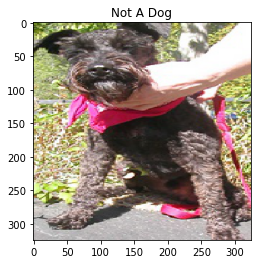

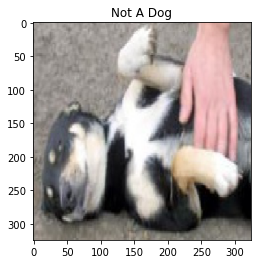

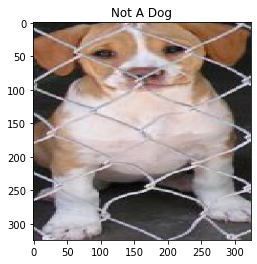

139


In [38]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/dog/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw23 = model23.predict(images, batch_size=10)
  #print('cats:',classesw1[0][2],classesw23[0])
  if((classesw1[0][2] > .5) and (classesw23[0] > .5)):    ct_dog=ct_dog+1
  else:
    plt.imshow(img)
    plt.title('Not A Dog')
    plt.show()
print(ct_dog)

In [43]:
ct_person = 0
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/person' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw23 = model23.predict(images, batch_size=10)
  # print('person:',classesw1[0][2],classesw23[0])
  if((classesw1[0][2] > .5) and (classesw23[0] < .5)):    ct_person=ct_person+1
  else:
    plt.imshow(img)
    plt.title('Not A person')
    plt.show()
print(ct_person)

./
166


./
person: 0.073954836 [0.9999999]


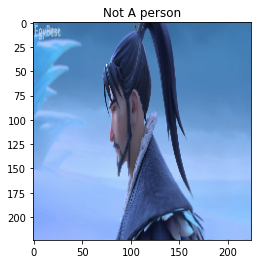

person: 1.0 [1.6457432e-22]
person: 1.0 [4.509086e-14]
person: 1.0 [1.8599404e-15]
person: 1.0 [4.0450853e-23]
person: 1.0 [4.094933e-18]
person: 1.0 [1.410825e-20]
person: 1.0 [3.7408204e-16]
person: 1.0 [1.238187e-18]
person: 1.0 [1.4609134e-24]
person: 1.0 [1.5378324e-23]
person: 1.0 [1.2149772e-22]
person: 1.0 [4.5055262e-18]
person: 1.0 [1.1949538e-24]
person: 4.010788e-09 [1.]


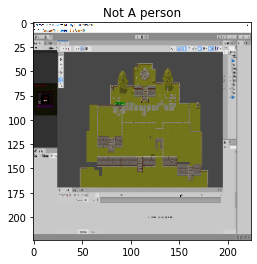

179


In [42]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/chris_evans' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw23 = model23.predict(images, batch_size=10)
  print('person:',classesw1[0][2],classesw23[0])
  if((classesw1[0][2] > .5) and (classesw23[0] < .5)):    ct_person=ct_person+1
  else:
    plt.imshow(img)
    plt.title('Not A person')
    plt.show()
print(ct_person)

In [47]:
ct_total=ct_motorbike+ct_airplane+ct_car+ct_flower+ct_person+ct_dog

In [48]:
print('Total = ',ct_total)
print('Breakup = ',ct_person,ct_dog,ct_motorbike, ct_airplane, ct_car, ct_flower)  
print('accuracy=',ct_total/977) 

Total =  964
Breakup =  166 139 167 167 160 165
accuracy= 0.9866939611054247
